In [48]:
import pandas as pd

averages_df = pd.DataFrame(columns=['Partition Size', 'average_guesses', 'average_time', 'total_time'])

In [49]:
partition_divisors = [2, 3, 4, 5, 8, 10, 15, 25, 33, 40, 55]

#partition_divisors = [40]

averages_df['Partition Size'] = partition_divisors

averages_cumulative_df = pd.DataFrame(columns=partition_divisors)

In [2]:
from mastermind import MastermindGame

game_settings = {
   "agentFile": "my_agent.py",
   "codeLength": 5,
   "numberOfColours": 6,
   "maxNumberOfGuesses": 10,
   "totalNumberOfGames": 250,
   "verbose": True,
   "seed": 0
}

game = MastermindGame(code_length=game_settings["codeLength"], num_colours=game_settings["numberOfColours"], verbose=False)

for divisor in partition_divisors[:4]:

    print("Running with divisor:", divisor)

    (average_guesses, average_time) = game.run(agentFile=game_settings['agentFile'],
                      num_guesses=game_settings['maxNumberOfGuesses'],
                      num_games=game_settings['totalNumberOfGames'],
                      seed=game_settings['seed'],
                      partition_divisor=divisor)

    averages_cumulative_df[divisor] = average_guesses

    averages_df.loc[averages_df['Partition Size'] == divisor, 'average_guesses'] = average_guesses[-1]
    averages_df.loc[averages_df['Partition Size'] == divisor, 'average_time'] = average_time

Running with divisor: 40
Average score after game 1: 6.00
Average running time per game 5 s.
Time remaining 23 min, 11 s.
Expected total running time 23 min, 16 s.
Average score after game 2: 5.50
Average running time per game 5 s.
Time remaining 22 min, 27 s.
Expected total running time 22 min, 38 s.
Average score after game 3: 5.33
Average running time per game 5 s.
Time remaining 23 min, 20 s.
Expected total running time 23 min, 37 s.
Average score after game 4: 4.75
Average running time per game 4 s.
Time remaining 18 min, 2 s.
Expected total running time 18 min, 20 s.
Average score after game 5: 5.00
Average running time per game 4 s.
Time remaining 18 min, 18 s.
Expected total running time 18 min, 41 s.
Average score after game 6: 4.83
Average running time per game 4 s.
Time remaining 18 min, 36 s.
Expected total running time 19 min, 3 s.
Average score after game 7: 5.29
Average running time per game 4 s.
Time remaining 18 min, 53 s.
Expected total running time 19 min, 25 s.
Aver

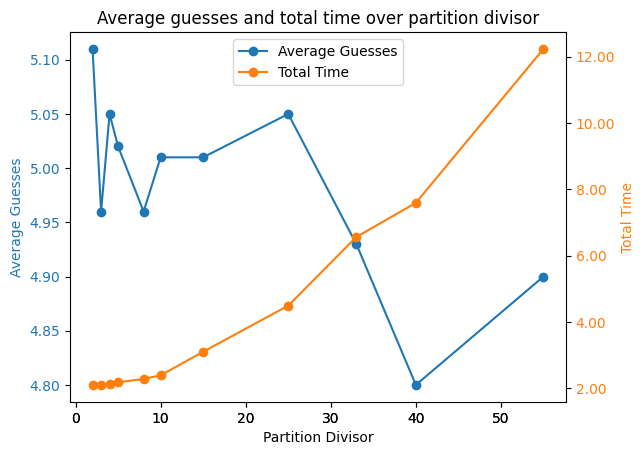

In [107]:
import matplotlib.pyplot as plt

# Create a figure and two subplots with shared x-axis
fig, ax1 = plt.subplots()

# Plot 'average_guesses' on the left y-axis with a muted blue color
ax1.plot(averages_df['Partition Size'], averages_df['average_guesses'], marker='o', label='Average Guesses', color='tab:blue')
ax1.set_ylabel('Average Guesses', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis and plot 'total_time' on the right y-axis with a muted red color
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot(averages_df['Partition Size'], averages_df['total_time'], marker='o', label='Total Time', color='tab:orange')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Total Time', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, 1))

plt.title("Average guesses and total time over partition divisor")

plt.xlabel("Partition Divisor")  # Set the x-label for both axes

plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

plt.savefig("averages.png", dpi=400, bbox_inches='tight')
plt.show()


In [53]:
averages_df

,Partition Size,average_guesses,average_time,total_time
0,2,5.11,NaN,2.10
1,3,4.96,NaN,2.10
2,4,5.05,NaN,2.14
3,5,5.02,NaN,2.18
4,8,4.96,NaN,2.28
5,10,5.01,NaN,2.39
6,15,5.01,NaN,3.10
7,25,5.05,NaN,4.49
8,33,4.93,NaN,6.56
9,40,4.80,NaN,7.59


In [86]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

averages_cumulative_df.plot(y=40, label="Average guess size")

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=25))

# Plot the first axhline
final_average_value = averages_cumulative_df[40].iloc[-1]
plt.axhline(y=final_average_value, color="orange", label=f"Final average ({final_average_value :.2f})")

# Plot the second axhline
average_after_100_games_value = averages_cumulative_df[40].iloc[99]
plt.axhline(y=average_after_100_games_value, color="green", label=f"Average after 100 games ({average_after_100_games_value :.2f})")

plt.title("Average guess size over game number")
plt.xlabel("Game number")
plt.ylabel("Current average guess size")
plt.legend()

plt.savefig("averages_cumulative.png", dpi=300)
# Show the plot
plt.show()

#plt.xticks(averages_cumulative_df.index)

TypeError: no numeric data to plot

In [51]:
times = [2.10, 2.10, 2.14, 2.18, 2.28, 2.39, 3.10, 4.49, 6.56, 7.59, 12.23]
averages = [5.11, 4.96, 5.05, 5.02, 4.96, 5.01, 5.01, 5.05, 4.93, 4.80, 4.9]

averages_df['total_time'] = times
averages_df['average_guesses'] = averages

In [52]:
averages_df

,Partition Size,average_guesses,average_time,total_time
0,2,5.11,NaN,2.10
1,3,4.96,NaN,2.10
2,4,5.05,NaN,2.14
3,5,5.02,NaN,2.18
4,8,4.96,NaN,2.28
5,10,5.01,NaN,2.39
6,15,5.01,NaN,3.10
7,25,5.05,NaN,4.49
8,33,4.93,NaN,6.56
9,40,4.80,NaN,7.59


In [5]:
averages_cumulative_df

,40
0,6.000000
1,5.500000
2,5.333333
3,4.750000
4,5.000000
...,...
245,4.983740
246,4.983806
247,4.983871
248,4.983936
